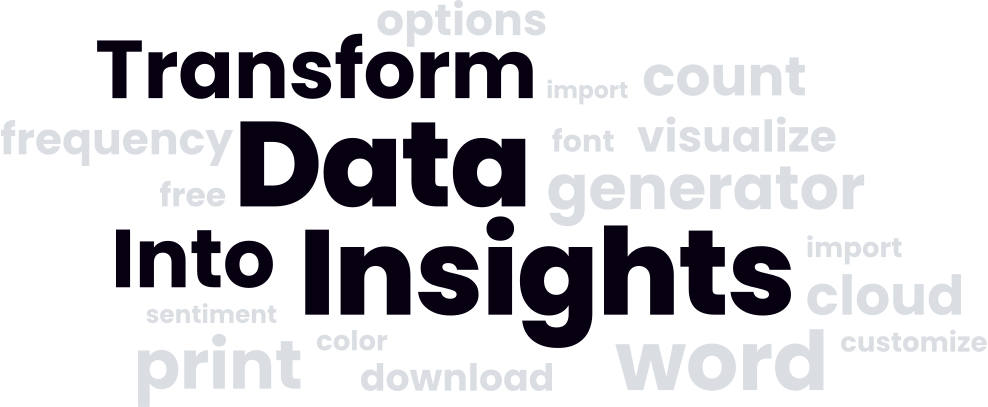

**Text visualization** in Natural Language Processing (NLP) involves creating visual representations of textual data to gain insights, explore patterns, and communicate findings. 

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Dropping Null Values
- Text Visualization
  - Negative Tweets
  - Positive Tweets
- Data Transformation
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data = pd.read_csv('twitter_sentiment_data_cleaned.csv', encoding = "ISO-8859-1")

In [3]:
# As the data has no column titles, we will add our own
twitter_data.columns = ['sentiment', 'text']

In [4]:
# Show the first 5 rows of the dataframe.
twitter_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
0,4,is lookin ward to a long weekend really dont want to go to work day tho x
1,4,myweakness is music and i live to meet the people who make it
2,4,figured out the internet on my new ipod
3,4,can not wait to worship with you guys tonight it ll be so much fun
4,4,congrats james i m sure the book is going to be a huge success


In [5]:
# Print bottom 5 rows in the dataframe.
twitter_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
399995,0,that is he does not know i tweet and i would like keep it that way sorry bad wife
399996,0,huh what
399997,0,only thing is im broke
399998,0,wish i could work from home today nothing will be going on here
399999,0,i miss you too i was so worried well today s my last day of school b the break glad u feel better love you


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", twitter_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(twitter_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(twitter_data.columns))

The shape of data frame: (400000, 2)
Number of Rows in the dataframe: 400000
Number of Columns in the dataframe: 2


In [7]:
twitter_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  400000 non-null  int64 
 1   text       399187 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [8]:
# Count the number of null values.
null_values_by_column = twitter_data.isna().sum()
print(null_values_by_column)

sentiment      0
text         813
dtype: int64


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DROPPING NULL VALUES</h2>
</div>

In [9]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
twitter_data_original = pd.read_csv('sentiment140.csv', header=None, encoding = "ISO-8859-1", names=cols)

In [10]:
# Seperating positive and negative rows
twitter_data_original_pos = twitter_data_original[twitter_data_original['sentiment'] == 4]
twitter_data_original_neg = twitter_data_original[twitter_data_original['sentiment'] == 0]

In [11]:
# Only retaining a fraction of the data from each output group using sample
frac = 1/4  # You can adjust this fraction as needed
twitter_data_original_pos = twitter_data_original_pos.sample(frac=frac, random_state=42)
twitter_data_original_neg = twitter_data_original_neg.sample(frac=frac, random_state=42)

In [12]:
# Concatenating both positive and negative groups and storing them back into a single dataframe
twitter_data_trim = pd.concat([twitter_data_original_pos, twitter_data_original_neg])

In [13]:
# Display lengths
print(len(twitter_data_original_pos), len(twitter_data_original_neg))
print(len(twitter_data_trim))

200000 200000
400000


In [14]:
twitter_data_original.iloc[twitter_data[twitter_data['text'].isnull()].index].head()

,sentiment,id,date,query_string,user,text
88,0,1467835198,Mon Apr 06 22:26:08 PDT 2009,NO_QUERY,ItsBrigittaYo,why is it always the fat ones?!
437,0,1467923370,Mon Apr 06 22:49:57 PDT 2009,NO_QUERY,xmattxwalkerx,"just woke up from the most vivid, sketchy, not..."
441,0,1467924690,Mon Apr 06 22:50:17 PDT 2009,NO_QUERY,FlyRice,Good GOD they ruined my belly button!!!
1983,0,1468278742,Tue Apr 07 00:42:38 PDT 2009,NO_QUERY,DreamCharon,4 am insomnia is a BITCH
2109,0,1468305783,Tue Apr 07 00:52:07 PDT 2009,NO_QUERY,TattooedGumball,Today I got2do shopping 4easter! &lt;3 Malachi...


Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [15]:
twitter_data.dropna(inplace=True)

In [16]:
twitter_data['sentiment'] = twitter_data['sentiment'].map({0:0,4:1})

In [17]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399187 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  399187 non-null  int64 
 1   text       399187 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">TEXT VISUALIZATION</h2>
</div>

In [18]:
stopwords = set(STOPWORDS)

In [19]:
# Generate WordCloud with custom parameters
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_font_size=60,
    random_state=42,
    colormap='viridis',  # You can change the colormap
    contour_color='steelblue',  # Color of the wordcloud border
    contour_width=2,  # Width of the wordcloud border
    width=800,
    height=400,
).generate(str(twitter_data['text']))

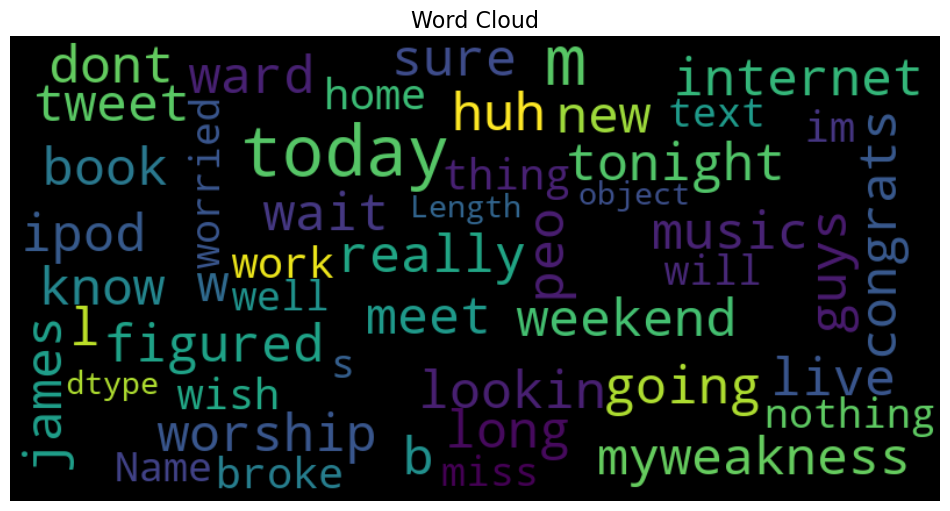

In [20]:
# Plot the WordCloud
fig = plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Negative Tweets </span>
</br>

This word cloud consists of the words which have the highest frequency among all the tweets, positive and negative both.

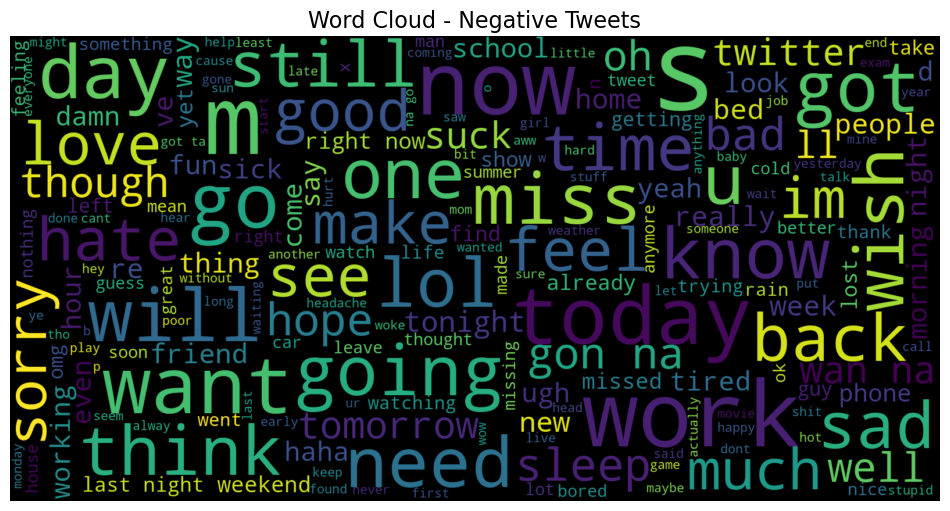

In [21]:
negative_tweets = twitter_data[twitter_data['sentiment']==0]

# Concatenate negative tweets
neg_tweet = ' '.join(negative_tweets['text'].astype(str))

# Generate WordCloud with custom parameters
neg_wordcloud = WordCloud(
    width=1600,
    height=800,
    max_font_size=200,
    background_color='black',
    colormap='viridis',  # You can change the colormap
    contour_color='steelblue',  # Color of the wordcloud border
    contour_width=2,  # Width of the wordcloud border
    random_state=42,
).generate(neg_tweet)

# Plot the WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.title('Word Cloud - Negative Tweets', fontsize=16)
plt.axis("off")
plt.show()

Some words, like, "want", "think", "going" can be termed as neutral. Words like, "dont", "stupid", "hurt", "cant" etc. make sense as negative words.

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Positive Tweets </span>
</br>

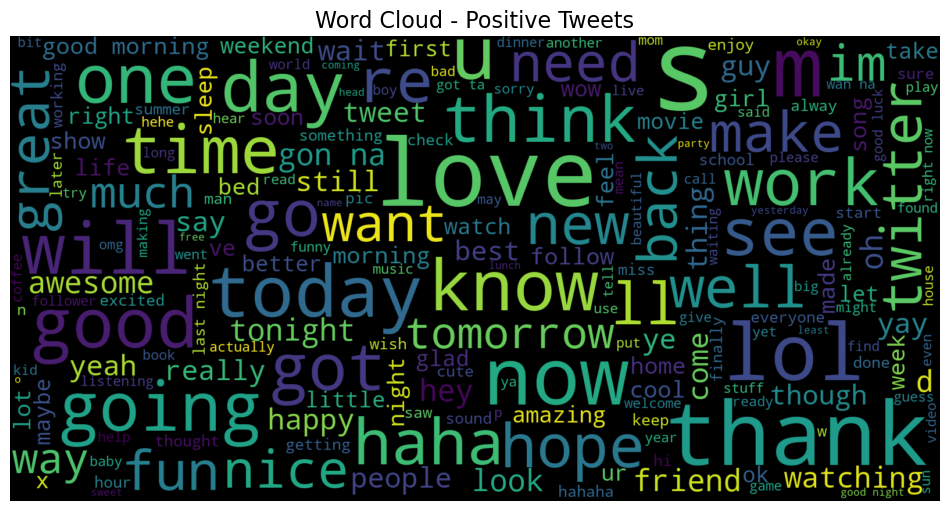

In [22]:
positive_tweets = twitter_data[twitter_data['sentiment']==1]

# Concatenate positive tweets
pos_tweet = ' '.join(positive_tweets['text'].astype(str))

# Generate WordCloud with custom parameters
pos_wordcloud = WordCloud(
    width=1600,
    height=800,
    max_font_size=200,
    background_color='black',
    colormap='viridis',  # You can change the colormap
    contour_color='steelblue',  # Color of the wordcloud border
    contour_width=2,  # Width of the wordcloud border
    random_state=42,
).generate(pos_tweet)

# Plot the WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.title('Word Cloud - Positive Tweets', fontsize=16)
plt.axis("off")
plt.show()

In this wordcloud of positive tweets, neutral words, like "today", "tonight", "still", etc are present. Also, words like "thank", "haha", "awesome", "good", etc stand out as the positive words.

Words like "day", "need", "will", "still", "work" etc are common in both the positive and negative tweets. Hence, it can be concluded that people have both positive and negative response towards work and their day.

What I found surprising is the presence of "lol" and "love" in both the positive and the negative tweets wordclouds. So, now, I am going to inspect this.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA TRANSFORMATION</h2>
</div>

In [23]:
vect = CountVectorizer()

In [24]:
#Tokenise and build vocab
vect.fit(twitter_data.text)

CountVectorizer()

In [25]:
len(vect.get_feature_names())

118312

Hence, the corpus consists of 118312 different words.

In [26]:
#Encode document
neg_matrix = vect.transform(twitter_data[twitter_data.sentiment==0].text)
pos_matrix = vect.transform(twitter_data[twitter_data.sentiment==1].text)

In [27]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [28]:
#Remove single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [29]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [30]:
term_freq_df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,0,1
aa,45,23
aaa,23,12
aaaa,10,6
aaaaa,5,3
aaaaaa,4,5


In [31]:
term_freq_df.columns = ['negative', 'positive']

In [32]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [33]:
term_freq_df.sort_values(by='total', ascending=False).head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,negative,positive,total
to,78026,63169,141195
the,64676,66278,130954
my,48048,31387,79435
it,39520,36896,76416
and,38529,37495,76024


In [34]:
# Assign a name to the index (which is now the first column)
term_freq_df = term_freq_df.rename_axis('word').reset_index()

In [35]:
term_freq_df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,word,negative,positive,total
0,aa,45,23,68
1,aaa,23,12,35
2,aaaa,10,6,16
3,aaaaa,5,3,8
4,aaaaaa,4,5,9


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING THE DATASET</h2>
</div>

In [36]:
output_file_path = 'twitter_term_frequency_data.csv'

In [37]:
# Save the DataFrame to a CSV file
term_freq_df.to_csv(output_file_path, index=False)

In [38]:
print("DataFrame saved to:", output_file_path)

DataFrame saved to: twitter_term_frequency_data.csv
